# **Las características que definen el nivel de felicidad.**

Reporte técnico de los niveles de felicidad de diversos países en el mundo mediante la implementación de modelos de **regresión lineal simple** con una variable independiente y de **regresión lineal múltiple** con cuatro variables independientes.

**Hecho por: Estefania Nájera de la Rosa - estefania.najera@udem.edu a 26 de enero del 2026.**

In [86]:
# Importar las librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 1.1 Introducción.

Para el presente estudio de la **felicidad** según distintas características, se empleará primero un modelo de **regresión lineal simple** con la variable de GDP, para más adelante emplear ahora un modelo de **regresión lineal múltiple** con varias variables en juego - este se va a realizar con tres variables aparte del GDP, sabiendo que esas tres son las que presentan una mayor correlación con la felicidad.

En cada uno de los modelos, se separan los datos para entrenar el modelo en datos de **entrenamiento** y de **prueba**, esto para dar pie a reportar los R2 respectivos para conocer si el modelo es confiable y los errores para conocer si el modelo es preciso tanto en la visualización de la inferencia como del modelo como tal. También se añade como un extra la predicción de cada modelo según cierto valor de las variables utilizadas.

La recopilación de los datos viene por el medio de Blackboard para la regresión lineal simple, para la eventual regresión lineal múltiple, estos vienen del World Happiness Report; ambas fuentes reportan datos del 2022.

# 1.2 Objetivo.

El objetivo de este estudio es conocer cuáles son los factores que afectan al nivel de felicidad de los individuos en ciertos países, esto puede ser significativo para las entidades tanto públicas como privadas de dichos países con el propósito de conocer a su población y conocer qué mejoras se necesitan implementar para subir los niveles de satisfacción en estas variables y por ende, tener mayores niveles de felicidad para evitar problemas sociales, económicos, migratorios, etc.

# 2.1 Descripción del conjunto de datos.

**Regresión lineal simple.**

Como se mencionó anteriormente, los datos utilizados para la regresión lineal simple son aquellos brindados por medio de Blackboard, los mismos cuentan con las variables de:
* País.

* Felicidad.

* GDP.

In [2]:
# Cargar los datos.
url = 'https://raw.githubusercontent.com/estefaniadelarosa/IA-I/refs/heads/main/A1.2%20Regresi%C3%B3n%20lineal/A1.2%20Felicidad%20y%20GDP.csv'
df = pd.read_csv(url)
print(df.shape)
df.head()

(141, 3)


,Pais,Felicidad,GDP
0,Finland,7.8210,2.718370e+11
1,Denmark,7.6362,3.560850e+11
2,Iceland,7.5575,2.171808e+10
3,Switzerland,7.5116,7.522480e+11
4,Netherlands,7.4149,9.138650e+11


In [3]:
# Convertimos las variables categóricas a categóricas numéricas.
from sklearn.preprocessing import LabelEncoder 

# Aplicamos la transformación.
df['Pais_Num'] = LabelEncoder().fit_transform(df['Pais'])

df.sample(5)

,Pais,Felicidad,GDP,Pais_Num
46,Poland,6.1228,5.966240e+11,106
63,Belarus,5.8215,6.148959e+10,10
48,Kuwait,6.1061,1.059600e+11,68
102,Gabon,4.9583,1.531682e+10,42
34,Estonia,6.3408,3.065029e+10,37


Es importante mencionar que en el caso de estos específicos datos, los valores dentro de la variable GDP son muy grandes y no se ajustan para implementar el modelo de regresión lineal simple, por lo que se transformaran como logaritmo para "estandarlizarlos".

Esta nueva variable para el GDP es la que se usará a lo largo del desarrollo del modelo.

In [4]:
# Valores muy grandes en GDP.
df["log_gdp"] = np.log(df["GDP"])
df.sample(5)

,Pais,Felicidad,GDP,Pais_Num,log_gdp
41,Serbia,6.1780,5.333502e+10,113,24.699859
90,Bangladesh,5.1555,3.739020e+11,9,26.647260
61,Jamaica,5.8496,1.381243e+10,62,23.348834
100,Niger,5.0035,1.374138e+10,97,23.343677
29,Italy,6.4667,1.892570e+12,60,28.268957


In [69]:
# Estadísticas básicas individuales.
print("Estadísticas de la variable: Felicidad.")
print('Min = ', df['Felicidad'].min())
print('Max = ', df['Felicidad'].max())
print('Mean = ', df['Felicidad'].mean())

print("\nEstadísticas de la variable: GDP.")
print('Min = ', df['log_gdp'].min())
print('Max = ', df['log_gdp'].max())
print('Mean = ', df['log_gdp'].mean())

print("\nEstadísticas de la variable: País.")
print('Mode = ', df['Pais'].mode()[0]) # [0] para quitar el 0 que aparecía antes.

Estadísticas de la variable: Felicidad.
Min =  2.403800011
Max =  7.821000099
Mean =  5.560004247886525

Estadísticas de la variable: GDP.
Min =  20.925288761825037
Max =  30.670468794051832
Mean =  25.155928418693613

Estadísticas de la variable: País.
Mode =  Afghanistan


Una vez con su transformación, es que podemos sacar las siguientes estadísticas:
* El **valor mínimo** registrado de la **felicidad** es de 2.40, mientras que el **máximo** es de 7.82 con un **promedio** de 5.56.

* El **valor mínimo** registrado del **GDP** es de 20.9, mientras que el **máximo** es de 30.6 con un **promedio** de 25.1.

* El **país** con **más registros** es **Afghanistan**.

**Regresión lineal múltiple.**

De igual forma para este segundo modelo de regresión lineal múltiple, se mencionó anteriormente que ahora los datos fueron conseguidos del World Health Report, los mismos cuentan con las variables de: 
* Rank.

* Country	

* Happiness score	

* Whisker-high.

* Whisker-low	

* Dystopia (1.83) + residual.

* Explained by: GDP per capita.

* Explained by: Social support.

* Explained by: Healthy life expectancy.

* Explained by: Freedom to make life choices.

* Explained by: Generosity.

* Explained by: Perceptions of corruption.

In [19]:
# Importamos los datos.
url = "https://raw.githubusercontent.com/estefaniadelarosa/IA-I/main/A1.2%20Regresi%C3%B3n%20lineal/WHR22_Data_Figure_2.1.xlsx"
df_extra = pd.read_excel(url)
print(df_extra.shape)
df_extra.head()

(147, 12)


,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.8210,7.886425,7.755575,2.518052,1.891628,1.258108,0.775206,0.735590,0.108733,0.533658
1,2,Denmark,7.6362,7.709897,7.562503,2.225632,1.952595,1.242681,0.776644,0.718918,0.187626,0.532079
2,3,Iceland,7.5575,7.651076,7.463924,2.320185,1.935726,1.319914,0.802622,0.718194,0.269616,0.191204
3,4,Switzerland,7.5116,7.586394,7.436806,2.152746,2.025970,1.226074,0.822048,0.676947,0.146822,0.461004
4,5,Netherlands,7.4149,7.471265,7.358534,2.136937,1.944578,1.205848,0.786738,0.650682,0.271076,0.419083


In [20]:
# Verificar si hay datos vacíos.
df_extra.isna().sum().sort_values(ascending = False)

Happiness score                               1
Whisker-high                                  1
Whisker-low                                   1
Dystopia (1.83) + residual                    1
Explained by: GDP per capita                  1
Explained by: Social support                  1
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    1
Explained by: Generosity                      1
Explained by: Perceptions of corruption       1
RANK                                          0
Country                                       0
dtype: int64

In [21]:
# Borrar datos vacíos de todas las columnas y guardar.
df_clean = df_extra.dropna(axis = 0)

In [22]:
print(df_clean.shape)

(146, 12)


Como esta base de datos es sacada de internet, se limpió la misma para asegurarnos de que no hubieran datos vacíos que no nos sirven de nada.

In [72]:
# Estadísticas básicas individuales.
print("Estadísticas de la variable: Explained by: Social support.")
print('Min = ', df_clean['Explained by: Social support'].min())
print('Max = ', df_clean['Explained by: Social support'].max())
print('Mean = ', df_clean['Explained by: Social support'].mean())

print("\nEstadísticas de la variable: Explained by: Healthy life expectancy.")
print('Min = ', df_clean['Explained by: Healthy life expectancy'].min())
print('Max = ', df_clean['Explained by: Healthy life expectancy'].max())
print('Mean = ', df_clean['Explained by: Healthy life expectancy'].mean())

print("\nEstadísticas de la variable: Explained by: Freedom to make life choices.")
print('Min = ', df_clean['Explained by: Freedom to make life choices'].min())
print('Max = ', df_clean['Explained by: Freedom to make life choices'].max())
print('Mean = ', df_clean['Explained by: Freedom to make life choices'].mean())

print("\nEstadísticas de la variable: Explained by: Freedom to make life choices.")
print('Min = ', df_clean['Explained by: Generosity'].min())
print('Max = ', df_clean['Explained by: Generosity'].max())
print('Mean = ', df_clean['Explained by: Generosity'].mean())

Estadísticas de la variable: Explained by: Social support.
Min =  0.0
Max =  1.3199135065078735
Mean =  0.9058339569768677

Estadísticas de la variable: Explained by: Healthy life expectancy.
Min =  0.0
Max =  0.9418286681175232
Mean =  0.5861464691896962

Estadísticas de la variable: Explained by: Freedom to make life choices.
Min =  0.0
Max =  0.7400385737419128
Mean =  0.517225446919464

Estadísticas de la variable: Explained by: Freedom to make life choices.
Min =  0.0
Max =  0.4679258465766907
Mean =  0.14737209333872345


Una vez con su limpieza realizada, es que podemos sacar las siguientes estadísticas:
* El **valor máximo** registrado del valor de el **apoyo social** es de 2.40, mientras que el **promedio** de 0.90.

* El **valor máximo** registrado del valor de la **expectativa de calidad de vida** es de 0.94, mientras que el **promedio** de 0.58.

* El **valor máximo** registrado del valor de la **libertad de tomar sus propias decisiones** es de 0.74, mientras que el **promedio** de 0.51.

* El **valor máximo** registrado del valor de la **libertad de tomar sus propias decisiones** es de 0.46, mientras que el **promedio** de 0.14.

Estos análisis son realizados para conocer cómo es que se dispersan nuestros datos, para saber cuál es el mejor valor registrado de cada respectiva variable, así como su promedio. Esto nos servirá para los pronósticos que se realizarán más adelante para escenarios ficticios pero probables.

# 3.1 Definición de las variables de interés.

Una vez conociendo los datos a gran escala, es importante definir cuál será tanto nuestra **variable dependiente**, como la **variable independiente** para la regresion lineal simple y las **variables independientes** (en plural) para la regresión lineal múltiple.

# 3.2 Variable dependiente.

In [74]:
print("Estadísticas de la variable: Felicidad.")
print('Min = ', df['Felicidad'].min())
print('Max = ', df['Felicidad'].max())
print('Mean = ', df['Felicidad'].mean())

print("\nEstadísticas de la variable: Happiness score.")
print('Min = ', df_clean['Happiness score'].min())
print('Max = ', df_clean['Happiness score'].max())
print('Mean = ', df_clean['Happiness score'].mean())

Estadísticas de la variable: Felicidad.
Min =  2.403800011
Max =  7.821000099
Mean =  5.560004247886525

Estadísticas de la variable: Happiness score.
Min =  2.4038000106811523
Max =  7.821000099182129
Mean =  5.553575332850626


Nuestra **variable dependiente** es la de **felicidad**, esto tanto para la **regresión lineal simple** y la **regresión lineal múltiple** ya que es lo que estamos investigando en cada modelo, solo cambiando las variables independientes.

Brevemente se vuelve a mencionar la siguiente información:
* El **valor mínimo** registrado de la **felicidad** es de 2.40, mientras que el **máximo** es de 7.82 con un **promedio** de 5.56.

Que es referente con respecto a la variable dependiente.

# 3.3 Variable independiente.

Para cada tipo de modelo a desarrollar, se mencionarán la o las variables independientes que estarán en conjunto con la variable dependiente de felicidad.

**Regresión lineal simple.**

* GDP (originalmente log_gdp).

In [6]:
# Obtener la correlación.
correlacion = (df.corr(numeric_only=True)[['Felicidad']].sort_values(by = 'Felicidad', ascending = False))
correlacion

,Felicidad
Felicidad,1.000000
log_gdp,0.470812
GDP,0.172159
Pais_Num,-0.040741


**Regresión lineal múltiple.**

* Explained by: GDP per capita - igual a GDP de regresión lineal simple (0.763676).

* Explained by: Social support (0.773264).

* Explained by: Healthy life expectancy (0.740273).

* Explained by: Freedom to make life choices (0.624708).

Se mencionó desde la introducción que estas tres nuevas variables aparte del GDP, fueron elegidas ya que presentan la mayor correlación con respecto a la felicidad - todas las correlaciones son mayores a 0.60.

In [26]:
# Determinar la correlación de variables.
df_clean.corr(numeric_only = True).sort_values(by = 'Happiness score', ascending = False)

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Country_Num
Happiness score,-0.980853,1.000000,0.999332,0.999384,0.498970,0.763676,0.777808,0.740273,0.624708,0.063483,0.416272,-0.045796
Whisker-low,-0.982030,0.999384,0.997433,1.000000,0.483798,0.773822,0.781194,0.751513,0.625756,0.061569,0.418179,-0.043527
Whisker-high,-0.978343,0.999332,1.000000,0.997433,0.514111,0.752114,0.773264,0.727602,0.622798,0.065392,0.413743,-0.048098
Explained by: Social support,-0.773704,0.777808,0.773264,0.781194,0.083534,0.722432,1.000000,0.666691,0.480202,-0.002390,0.223487,0.100530
Explained by: GDP per capita,-0.792130,0.763676,0.752114,0.773822,-0.073486,1.000000,0.722432,0.815517,0.458503,-0.164487,0.377905,-0.051489
Explained by: Healthy life expectancy,-0.750952,0.740273,0.727602,0.751513,-0.006890,0.815517,0.666691,1.000000,0.432967,-0.098089,0.362500,-0.020697
Explained by: Freedom to make life choices,-0.622911,0.624708,0.622798,0.625756,0.117725,0.458503,0.480202,0.432967,1.000000,0.176580,0.402380,0.066605
Dystopia (1.83) + residual,-0.444636,0.498970,0.514111,0.483798,1.000000,-0.073486,0.083534,-0.006890,0.117725,0.066678,-0.051494,-0.141767
Explained by: Perceptions of corruption,-0.403284,0.416272,0.413743,0.418179,-0.051494,0.377905,0.223487,0.362500,0.402380,0.095141,1.000000,0.001440
Explained by: Generosity,-0.032604,0.063483,0.065392,0.061569,0.066678,-0.164487,-0.002390,-0.098089,0.176580,1.000000,0.095141,0.161584


# 4.1 Metodología.

**Regresión lineal simple.**

Para comenzar con la regresión lineal simple, empezaremos graficando nuestros datos, respectivamente la variable dependiente e independiente para ver su comportamiento - **importante mencionar que los datos vienen de la base de datos de Blackboard.**

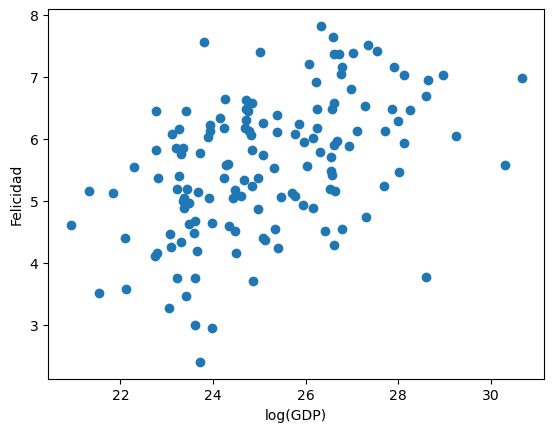

In [7]:
# y = 'Felicidad' / x = GDP (mayor correlación).
plt.scatter(df['log_gdp'], df['Felicidad'])
plt.xlabel('log(GDP)')
plt.ylabel('Felicidad')
plt.show()

Una vez viendo el comportamiento de nuestros datos de forma visual,  es que se delimitan tanto la variable dependiente 'Y' siendo Felicidad, como la variable independiente 'X' es aquella de log_gdp, la sucesora logáritmica de la variable inicial de GDP.

In [8]:
y = df[['Felicidad']] 
x = df[['log_gdp']]
print(y.shape)
print(x.shape)

(141, 1)
(141, 1)


Ya con nuestras variables definidas, seguimos con la separación de los datos de entrenamiento y prueba, que van a ser de utilidad tanto para el aspecto de la inferencia y del modelo.

In [9]:
# Dividir los tratos en train y test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# test_size = Tamaño de los datos de validación y 20% de validación/el otro 80% de entrenamiento.
# random_state = condición para que a todos los divida los datos de validación y entrenamiento de misma forma (semilla de notoriedad).
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112, 1), (29, 1), (112, 1), (29, 1))

Definimos nuestro modelo de regresión lineal con LinearRegression() que lo proporciona la librería de sklearn.linear_model, importada desde un principio.

In [10]:
# Modelo establecido.
modelRLS = LinearRegression()
# Modelo entrenado.
modelRLS.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Para seguir abarcando el aspecto visual, realizaremos dos gráficas para ver como se han separado los respectivos datos de entrenamiento y de prueba.

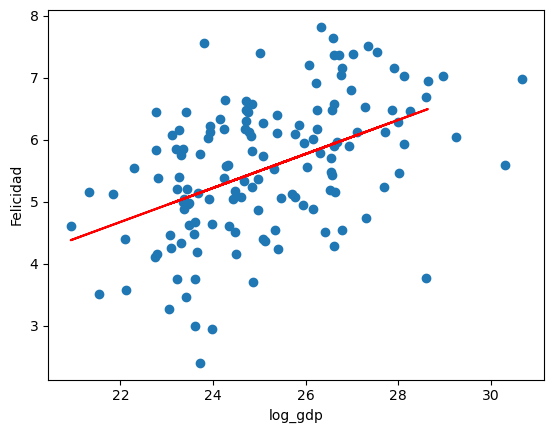

In [84]:
# Gráfico de Dispersión vs Línea de Regresión.
# Con TODOS los datos.
plt.scatter(df['log_gdp'], df['Felicidad'])
plt.plot(x_test, y_pred_test, color = 'red')
plt.xlabel('log_gdp')
plt.ylabel('Felicidad')
plt.show()

A simple vista, se puede observar que todos los datos reunidos correlación positiva fuerte - bastantes puntos si se ajustan a la línea trazada.

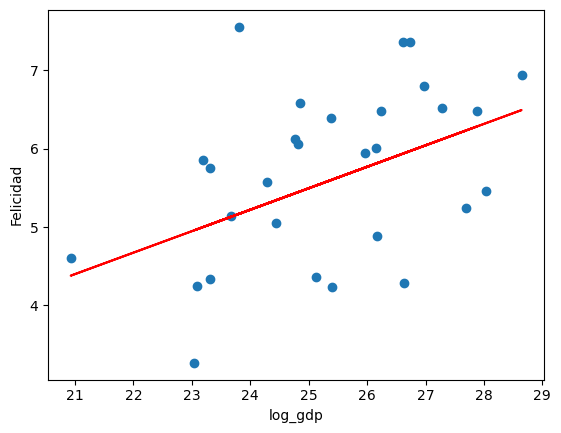

In [85]:
# Gráfico de Dispersión vs Línea de Regresión.
# Con datos de validación.
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, color = 'red')
plt.xlabel('log_gdp')
plt.ylabel('Felicidad')
plt.show()

Por otro lado, cuando se grafican los datos de validación de entrenamiento y prueba, se puede observar que esta relación aora tiene una correlación positiva débil, muy pocos puntos se ajustan a la línea trazada.

**Regresión lineal simple - Inferencia.**

Para conocer cómo se comportan nuestros datos bajo la inferencia, es decir, a día de hoy, es que se estarán estudiando los intervalos de confianza, seguido de los RSS (Residual Sum of Squares), TSS (Total Sum of Squares) y el RSE (Residual Standard Error).

In [77]:
# Aspecto de la inferencia.
X = sm.add_constant(x_train)  
model_inference = sm.OLS(y_train, X).fit()
model_inference.conf_int() # Intervalo de confianza del 95%.

,0,1
const,-3.752883,1.050881
log_gdp,0.178509,0.369252


Para los interceptos de log_gdp, obtenemos [0.178, 0.369], donde estos sí son significativos ya que no se incluye al 0, por lo que concluimos que log_gdp (GDP) si afecta a la felicidad.

In [82]:
# Aspecto de inferencia. 
y_pred = modelRLS.predict(x_test) # Preddicción.

residuals = y_test - y_pred # Errores.

# RSS (Residual Sum of Squares).
RSS = np.sum(residuals**2)

# TSS (Total Sum of Squares).
TSS = np.sum((y_test - np.mean(y_test))**2)

# RSE (Residual Standard Error).
n = len(y_test)
p = 1 # Solo 1 variable.
RSE = np.sqrt(RSS / (n - p - 1))

print("RSS =", RSS)
print("TSS =", TSS)
print("RSE =", RSE)


RSS = Felicidad    27.809239
dtype: float64
TSS = Felicidad    34.044643
dtype: float64
RSE = Felicidad    1.014875
dtype: float64


/opt/anaconda3/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Para los errores en la inferencia, obtenemos los siguientes valores:

* RSS (Residual Sum of Squares): 27.8
    * El modelo se equivoca en una medida de: 27.8

* TSS (Total Sum of Squares): 34.0
    * La variabilidad total es de 34.0

* RSE (Residual Standard Error): 1.02
    * El error típico es de 1.02

**Regresión lineal simple - Predicción.**

Ahora sí, entramos de lleno a la predicción, esto para conocer el alcance de la regresión lineal.

Comenzamos validando si el modelo pronostica adecuadamente.

In [83]:
# Validar si el modelo pronostica adecuadamente.
y_pred_test = modelRLS.predict(x_test)
print(y_pred_test[0:5])
print(y_test.head())

[[5.43298385]
 [5.00204096]
 [5.93844947]
 [5.44557177]
 [5.03369905]]
    Felicidad
45     6.1252
60     5.8568
7      7.3651
51     6.0627
66     5.7607


Después,, vamos a calcular el R2 para conocer qué tan bien se ajusta el modelo a nuestros datos, si obtenemos valores pequeños, quiere decir que nuestro modelo no presenta sobreajste, es decir, que este es confiable - mientras que si obtenemos valores muy altos, es todo lo contrario.

Esto es de mucha ayuda para saber la calidad de pronósticos de nuestro modelo.

In [14]:
R2_train = modelRLS.score(x_train, y_train)
print('R2 train = {:.2f}'.format(R2_train))
R2_test = modelRLS.score(x_test, y_test)
print('R2 test = {:.2f}'.format(R2_test))
print('Diferencia = {:.4f}%'.format(np.abs(R2_train-R2_test)*100))

R2 train = 0.23
R2 test = 0.18
Diferencia = 4.4312%


Obtenemos que nuestro modelo de regresión lineal simple **no** presenta sobreajuste, ya que obtenemos una diferencia de R2 entre entrenamiento y prueba de 4.4312% aproximadamente.

Con esto concluimos que tenemos un modelo **confiable.**

Además de la confiabilidad, también se puede obtener la precisión del modelo para sus predicciones, cosa que se realizará por consiguiente, guiandonos por el MAPE, sobretodo de prueba que es el esencial para interpretar los datos de salida que nos arrojará el modelo según los datos de entrada que brindemos.

In [15]:
# Obtener y_pred_train - pred = gorrito.
y_pred_train = modelRLS.predict(x_train)

# Importar las librerías para el cálculo de error.
from sklearn.metrics import mean_squared_error # MSE.
from sklearn.metrics import mean_absolute_percentage_error #MAPE.

# Calculamos los errores de train.
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train) # SQRT DEL MSE ES EL RMSE.
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)*100

print('MSE train = {:.2f}'.format(mse_train))
print('RMSE train = {:.2f}'.format(rmse_train))
print('MAPE train = {:.2f}'.format(mape_train))

# Calculamos los errores de test.
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_train) # SQRT DEL MSE ES EL RMSE.
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)*100

print('\nMSE test = {:.2f}'.format(mse_test))
print('RMSE test = {:.2f}'.format(rmse_test))
print('MAPE test = {:.2f}'.format(mape_test))

MSE train = 0.93
RMSE train = 0.96
MAPE train = 15.51

MSE test = 0.96
RMSE test = 0.96
MAPE test = 15.29


Obtenemos un MAPE test de 15.29, esto significa que la precisión del modelo es **moderada**, aún así podemos realizar predicciones con coherencia.

No se dejará de lado el obtener la ecuación de la recta, esencial para la regresión lineal, en este escenario se va a realizar que la felicidad sea igual al GDP (logarítmico).

Esta es nuestra ecuación de la recta: **Happiness = -1.35 + 0.27 * Log GDP**

In [49]:
print('B0 = {:.2f}'.format(modelRLS.intercept_[0])) # Beta subzero. 
print('B1 = {:.2f}'.format(modelRLS.coef_[0][0])) # Pendiente de la recta (razón de cambio de los datos/y).
print('Ecuación de la recta')
print('Happiness = {:.2f} + {:.2f} * Log GDP'.format(modelRLS.intercept_[0], modelRLS.coef_[0][0]))

B0 = -1.35
B1 = 0.27
Ecuación de la recta
Happiness = -1.35 + 0.27 * Log GDP


Finalmente, obtenemos predicciones de la felicidad para diversos escenarios según su valor de GDP:

* GDP de 20.3 - Felicidad del 4.2, un poco más de la mínima.

* GDP de 15.9 - Felicidad del 3.00, casi en la mínima.

* GDP de 20 - Felicidad del 5.22, en el promedio.

In [18]:
modelRLS.predict([[20.3], [15.9], [24.0]])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4.20876996],
       [3.00369643],
       [5.22212724]])

**Regresión lineal múltiple.**

In [24]:
# Convertimos las variables categóricas a categóricas numéricas.
from sklearn.preprocessing import LabelEncoder 

# Aplicamos la transformación.
df_clean['Country_Num'] = LabelEncoder().fit_transform(df_clean['Country'])

df_clean.sample(5)

/var/folders/rw/krrrqrzn68j3jq_d4yl8mzk80000gn/T/ipykernel_38786/3880910079.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Country_Num'] = LabelEncoder().fit_transform(df_clean['Country'])


,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Country_Num
93,94,Bangladesh,5.1555,5.261958,5.049042,1.966932,1.060256,0.613713,0.580691,0.622273,0.124936,0.186704,9
75,76,Ecuador,5.5333,5.653061,5.413538,1.866107,1.351699,0.879161,0.708149,0.564723,0.080321,0.083115,34
78,79,North Cyprus*,5.4666,5.608694,5.324506,1.078338,1.815065,0.888054,0.819165,0.522693,0.130266,0.213033,99
4,5,Netherlands,7.4149,7.471265,7.358534,2.136937,1.944578,1.205848,0.786738,0.650682,0.271076,0.419083,94
98,99,Congo,5.0752,5.235394,4.915006,2.657927,0.950383,0.405160,0.355222,0.430860,0.130043,0.145644,27


Para seguir con la regresión lineal múltiple, también se dividen los datos entre la variable dependiente e independientes en **plural,** ya que ahora se tomarán aparte del GDP (GDP ahora conocido como: Explained by: GDP per capita) tres variables nuevas que vienen de la base de datos obtenida del World Happiness Report.

Volviendo a mencionar estas tres variables nuevas, las siguientes son:

* Explained by: Social support.

* Explained by: Freedom to make life choices.

* Explained by: Healthy life expectancy.

In [31]:
# Definir quién sera mi "x" y "y".
# Se necesitan datos en segundas dimensiones.
y2 = df_clean[['Happiness score']] # Doble [].
x2 = df_clean[['Explained by: Social support', 'Explained by: Freedom to make life choices', 'Explained by: Healthy life expectancy', 'Explained by: GDP per capita']]
print(y2.shape)
print(x2.shape)

(146, 1)
(146, 4)


Se dividen nuestros datos en entrenamiento y prueba.

In [32]:
# Dividir los tratos en train y test.
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2, random_state = 0)
x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape

((116, 4), (30, 4), (116, 1), (30, 1))

De nuevo, repetimos el estudio de los intervalos de confianza y de RSS (Residual Sum of Squares), TSS (Total Sum of Squares) y el RSE (Residual Standard Error).

In [37]:
# Formulamos el modelo.
modelRLM2 = LinearRegression()
# Entrenamos el modelo.
modelRLM2.fit(x_train2, y_train2)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [89]:
modelRLM2 = smf.ols(formula='Q("Happiness score") ~ Q("Explained by: GDP per capita") + Q("Explained by: Social support") + Q("Explained by: Healthy life expectancy") + Q("Explained by: Freedom to make life choices")', data = df_clean).fit()
modelRLM2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Q("Happiness score")   R-squared:                       0.762
Model:                              OLS   Adj. R-squared:                  0.755
Method:                   Least Squares   F-statistic:                     112.9
Date:                  Mon, 26 Jan 2026   Prob (F-statistic):           6.13e-43
Time:                          12:24:26   Log-Likelihood:                -114.03
No. Observations:                   146   AIC:                             238.1
Df Residuals:                       141   BIC:                             253.0
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                           1.7407      0.190      9.140      0.000       1.364       2.117
Q("Explained by: GDP per capita")                   0.5290      0.202      2.619      0.010       0.130       0.928
Q("Explained by: Social support")                   1.3758      0.241      5.703      0.000       0.899       1.853
Q("Explained by: Healthy life expectancy")          1.3688      0.447      3.062      0.003       0.485       2.253
Q("Explained by: Freedom to make life choices")     1.9686      0.356      5.529      0.000       1.265       2.672
==============================================================================
Omnibus:                        5.787   Durbin-Watson:                   1.487
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.666
Skew:                          -0.482   Prob(JB):                       0.0588
Kurtosis:                       3.036   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Es importante detallar que entre las variables **no** existe multicolinealidad, por lo que no hay que quitar alguna o algunas de estas para nuestro modelo - es decir, que todas pueden "convivir" dentro del estudio sin problema.

**Regresión lineal múltiple - Inferencia.**

Nuevamente, para conocer cómo se comportan nuestros datos bajo la inferencia, es decir, a día de hoy, es que se estarán estudiando los intervalos de confianza, seguido de los RSS (Residual Sum of Squares), TSS (Total Sum of Squares) y el RSE (Residual Standard Error).

In [78]:
# Aspecto de la inferencia.
X2 = sm.add_constant(x_train2)
model_inference2 = sm.OLS(y_train2, X2).fit()
model_inference2.conf_int()

,0,1
const,1.483966,2.295134
Explained by: Social support,0.678910,1.738970
Explained by: Freedom to make life choices,1.031909,2.541276
Explained by: Healthy life expectancy,0.576145,2.535758
Explained by: GDP per capita,0.103471,0.960641


Para los interceptos de las cuatro variables en total que tenemos disponibles, obtenemos los siguientes intervalos:

* Explained by: Social support - [0.678910, 1.738970]

* Explained by: Freedom to make life choices - [1.031909, 2.541276]

* Explained by: Healthy life expectancy - [0.576145, 2.535758]

* Explained by: GDP per capita - [0.103471, 0.960641]

Como ningún intervalo incluye el 0, concluímos que cada una de estas variables si afecta a la felicidad - haciendo referencia a la correlación obtenida anteriormente para conocer la significancia de las variables.

In [88]:
# Aspecto de inferencia. 
y_pred2 = modelRLM2.predict(x_test2) # Preddicción.

residuals = y_test2 - y_pred2 # Errores.

# RSS (Residual Sum of Squares).
RSS2 = np.sum(residuals**2)

# TSS (Total Sum of Squares).
TSS2 = np.sum((y_test - np.mean(y_test))**2)

# RSE (Residual Standard Error).
n2 = len(y_test)
p2 = 4 # Solo 4 variableS.
RSE2 = np.sqrt(RSS2  / (n2 - p2 - 1))

print("RSS =", RSS2)
print("TSS =", TSS2)
print("RSE =", RSE2)

RSS = Happiness score    10.320978
dtype: float64
TSS = Felicidad    34.044643
dtype: float64
RSE = Happiness score    0.655775
dtype: float64


/opt/anaconda3/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Para los errores en la inferencia, obtenemos los siguientes valores:

* RSS (Residual Sum of Squares): 10.3
    * El modelo se equivoca en una medida de: 10.3

* TSS (Total Sum of Squares): 34.0
    * La variabilidad total es de 34.0

* RSE (Residual Standard Error): 0.65
    * El error típico es de 0.65

**Regresión lineal múltiple - Predicción.**

Entramos ahora con la regresión lineal múltiple desde el lado de la predicción.

Comenzamos validando si el modelo pronostica adecuadamente.

In [38]:
# Validar si el modelo pronostica adecuadamente.
y_pred_test2 = modelRLM2.predict(x_test2)
print(y_pred_test2[0:5])
print(y_test2.head())

[[6.97313924]
 [6.26475661]
 [6.12160477]
 [4.91411889]
 [4.29621447]]
     Happiness score
7             7.3651
24            6.5228
27            6.4770
119           4.5160
142           3.2682


Seguimos con el R2, para conocer si existe o no sobreajuste de nuestros datos, es decir, saber si el modelo es confiable.

In [ ]:
R2_train2 = modelRLM2.score(x_train2, y_train2)
print('R2 train = {:.2f}'.format(R2_train2))
R2_test2 = modelRLM2.score(x_test2, y_test2)
print('R2 test = {:.2f}'.format(R2_test2))
print('Diferencia = {:.4f}%'.format(np.abs(R2_train2-R2_test2)*100)) 

R2 train = 0.77
R2 test = 0.74
Diferencia = 3.1910%


Obtenemos que nuestro modelo de regresión lineal múltiple **no** presenta sobreajuste, ahora obtenemos una diferencia de R2 entre entrenamiento y prueba de 3.1910% aproximadamente.

Con esto concluimos que tenemos un modelo **confiable.**

Seguimos con el MAPE, esto para conocer la precisión del modelo con los datos de prueba que son los que nos interesan.

In [ ]:
# Obtener y_pred_train - pred = gorrito.
y_pred_train2 = modelRLM2.predict(x_train2)

# Importar las librerías para el cálculo de error.
from sklearn.metrics import mean_squared_error # MSE.
from sklearn.metrics import mean_absolute_percentage_error #MAPE

# Calculamos los errores de train.
mse_train2 = mean_squared_error(y_train2, y_pred_train2)
rmse_train2 = np.sqrt(mse_train2) # SQRT DEL MSE ES EL RMSE.
mape_train2 = mean_absolute_percentage_error(y_train2, y_pred_train2)*100

print('MSE train = {:.2f}'.format(mse_train2))
print('RMSE train = {:.2f}'.format(rmse_train2))
print('MAPE train = {:.2f}'.format(mape_train2))

# Calculamos los errores de test.
mse_test2 = mean_squared_error(y_test2, y_pred_test2)
rmse_test2 = np.sqrt(mse_test) # SQRT DEL MSE ES EL RMSE.
mape_test2 = mean_absolute_percentage_error(y_test2, y_pred_test2)*100

print('\nMSE test = {:.2f}'.format(mse_test2))
print('RMSE test = {:.2f}'.format(rmse_test2))
print('MAPE test = {:.2f}'.format(mape_test2))

MSE train = 0.27
RMSE train = 0.52
MAPE train = 8.14

MSE test = 0.34
RMSE test = 0.98
MAPE test = 10.35


Obtenemos un MAPE test de 10.35, esto significa que la precisión del modelo es **muy precisa**, es decir, que podemos realizar predicciones muy exactas.

Seguimos con la respectiva ecuación de la recta: **Happiness = 1.89 + 1.21 * GDP + 1.79 * Social + 1.56 * Life + 0.53 * Freedom**

In [58]:
print('B0 = {:.2f}'.format(modelRLM2.intercept_[0])) # Beta subzero. 
print('B1 = {:.2f}'.format(modelRLM2.coef_[0][0])) # Pendiente de la recta (razón de cambio de los datos/y).
print('B2 = {:.2f}'.format(modelRLM2.coef_[0][1])) 
print('B3 = {:.2f}'.format(modelRLM2.coef_[0][2]))
print('B4 = {:.2f}'.format(modelRLM2.coef_[0][3]))
print('Ecuación de la recta:')
print('Happiness = {:.2f} + {:.2f} * GDP + {:.2f} * Social + {:.2f} * Life + {:.2f} * Freedom'.format(modelRLM2.intercept_[0], modelRLM2.coef_[0][0], modelRLM2.coef_[0][1], modelRLM2.coef_[0][2], modelRLM2.coef_[0][3]))

B0 = 1.89
B1 = 1.21
B2 = 1.79
B3 = 1.56
B4 = 0.53
Ecuación de la recta:
Happiness = 1.89 + 1.21 * GDP + 1.79 * Social + 1.56 * Life + 0.53 * Freedom


Finalmente, obtenemos predicciones de la felicidad para diversos escenarios según las siguientes variables y su valor brindado como dato de entrada:

* Explained by: Social support - 1.0

* Explained by: Freedom to make life choices - 0.75

* Explained by: Healthy life expectancy - 0.64

* Explained by: GDP per capita - 0.98

El nivel de felicidad para ests valores en conjunto es aproximadamente de 5.95, estando alrededor del promedio.


In [65]:
modelRLM2.predict([[1.0, 0.75, 0.64, 0.98]])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[5.95565852]])

# 5.1 Resultados. 

Para comparar y contrastar nuestros resultados del modelo, se van a tomar en cuenta los siguientes parámetros que obtuvimos:

* Regresión lineal simple:
    * RSS = 27.8
    * TSS = 34.0
    * RSE = 1.02
    * Diferencia = 4.4312% 
    * MAPE test = 15.29

* Regresión lineal múltiple:
    * RSS = 10.3
    * TSS = 34.0
    * RSE = 0.65
    * Diferencia = 3.1910%
    * MAPE test = 10.35


Si queremos decidir sobre qué modelo **es mejor,** este es sin duda alguna el de **regresión lineal múltiple.**

Esto es ya que los valores de RSS, RSE, la diferencia y el MAPE fueron menores, esto significando que el modelo mejoró muchísimo a comparación de su contrincante que fue el de regresión lineal simple; podemos asumir del mismo que este es tanto confiable como preciso a la vez - también agregando que todas las variables entre sí también presentan una fuerte correlación con relación a la felicidad, además de que entre ellas ya en el modelo, no presentan multicolinealidad.

# 6.1 Discusiones.

Para este estudio, solo se tuvo complicación en el aspecto de la inferencia por la razón de que era algo nuevo de implementar, sin embargo, esto fue sencillo y fue basicamente lo mismo que lo explicado en clase.

# 7.1 Conclusiones.

Para concluir, este estudio fue muy interesante ya que el tema de la regresión lineal es de suma importancia al ser un modelo sumamente relevante a la hora que esperar resultados cuantitativos, ya que el mismo presenta una alta interpretabilidad y es un método paramétrico al siempre estar esperando una relación específica que es lineal.

# 7.2 Aprendizajes.

Los aprendizajes de dicho estudio son principalmente brindados por el caso de estudio, ya que fue muy enriquecdor el conocer cuáles variables afectan para medir la felicidad de la población, siendo este un aspecto que no es imaginado de forma inmediata en que este sea estudiado e investigado más a fondo. Pero el mismo estudio de este puede prindar muchos beneficios para la misma población y esto resultando en su eventual progreso en diferentes ámbitos.

# 7.3 Implicaciones.

Las implicaciones de este estudio ya fueron mencionadas dentro del objetivo, estas siendo aquellas áreas de oportunidad que siempre se pueden mejorar en la población de un lugar para un mejor desempeño en la sociedad de dicho país.

# 7.4 Limitaciones.

Una de las limitaciones existentes puede ser por parte de aquellos países que no fueron incluidos en las bases de datos consultadas, ya que también sería de mucho apoyo para ellos conocer qué es lo que hace que su población esté en un estado de felicidad bajo las condiciones de su país.

# 7.5 Posibles líneas futuras.

Haciendo referencia a la limitación mencionada anteriormente, es donde también entra una posible línea futura para aquellos países que no se encuentran dentro de las bases de datos para que estos también puedan estudiar la felicidad de su población.

# 8.1 Referencias.

Data sharing | The World Happiness Report. (s. f.). https://www.worldhappiness.report/data-sharing/

# 9.1 Código de Honor de la Universidad de Monterrey.

Doy mi palabra que he realizado esta actividad con integridad académica.